 # Task 2 Analysis


In [1]:
# Creating a new column called 'SENTIMENT' that contains the sentiment scores of each review using nltk
from nltk.sentiment import vader
import nltk
import matplotlib.pyplot as plt
import requests
from collections import Counter
import pandas as pd

In [3]:
 #Read in the reviews data from a CSV file
sentiment_analysis_df = pd.read_csv(r"C:\Users\HomePC\Downloads\sentiment_content.csv")

In [5]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HomePC\AppData\Roaming\nltk_data...


True

In [ ]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
sentiment_analysis_df['SENTIMENT'] = sentiment_analysis_df['CONTENT'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
sentiment_analysis_dfb

,CONTENT,SENTIMENT
0,Stupidly tried BA again after a five year gap ...,-0.9281
1,Not Verified | Seat horribly narrow; 3-4-3 on...,0.9507
2,Glasgow to London delayed by 1 hour. My wife a...,-0.5984
3,"When I tried to check in online, I was offered...",0.9867
4,"I flew from Prague to LHR. Excellent service, ...",0.2669
...,...,...
1995,We were treated incredibly well and staff made...,0.9606
1996,I was scheduled to be on BA 114 from JFK to LH...,0.9401
1997,British Airways from London Heathrow to New Yo...,0.8232
1998,We flew British Airways BA2678 from Gatwick to...,0.8225


In [7]:
# Creating another new column called 'SENTIMENT_TYPE' that contains the type of sentiment of each review using nltk
# for each sentiment score in the 'SENTIMENT' column
sentiment_analysis_df['SENTIMENT_TYPE'] = sentiment_analysis_df['SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
sentiment_analysis_df

,CONTENT,SENTIMENT,SENTIMENT_TYPE
0,Stupidly tried BA again after a five year gap ...,-0.9281,negative
1,Not Verified | Seat horribly narrow; 3-4-3 on...,0.9507,positive
2,Glasgow to London delayed by 1 hour. My wife a...,-0.5984,negative
3,"When I tried to check in online, I was offered...",0.9867,positive
4,"I flew from Prague to LHR. Excellent service, ...",0.2669,positive
...,...,...,...
1995,We were treated incredibly well and staff made...,0.9606,positive
1996,I was scheduled to be on BA 114 from JFK to LH...,0.9401,positive
1997,British Airways from London Heathrow to New Yo...,0.8232,positive
1998,We flew British Airways BA2678 from Gatwick to...,0.8225,positive


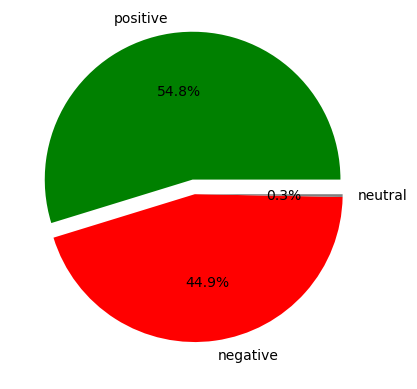

In [8]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = sentiment_analysis_df['SENTIMENT_TYPE'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index, 
    colors=['green', 'red', 'grey'], 
    explode=[0.1, 0, 0], 
    autopct='%1.1f%%'
    )

plt.show()

# Sentiment

In [10]:
#Saving the new data into a csv
sentiment_analysis_df.to_csv(r"C:\Users\HomePC\Downloads\sentiment_content.csv")

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HomePC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

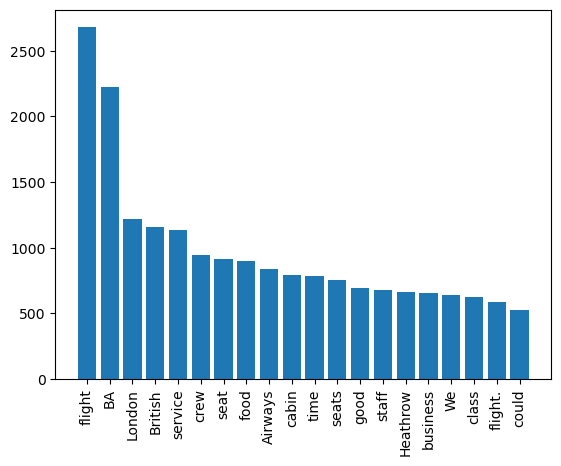

In [13]:
# The frequency chart shows the key topics within the 
# reviews showing what people are actively talking about their experience and staff

# Get the reviews from the dataframe
reviews = sentiment_analysis_df['CONTENT']

# Convert the reviews to a list of words
words = []
for review in reviews:
    words.extend(review.split())

# Filter out the stubborn stop words that don't want to disappear
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]

# Get the top 20 most used key words
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Filter out the stop words 
filtered_words = [
    (word, count) for word, count in top_20_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]

# Get the labels and values for the histogram
labels, values = zip(*top_20_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

#Display the plot
plt.show()